##### At first we want to see all the methos of ensemble:

![Alt_text](https://spotintelligence.com/wp-content/uploads/2024/03/bagging-boosting-stacking.jpg)

##### As above we have bagging method like random forest and boosting method like AdaBoost. In following we will investigate xgboost which is a boosting method.

### Now lets go to XGBoost. 

##### We dont have XGBoost in anaconda. so we should install it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


In [3]:
# | Column Name                      | Description                                                           |
# | -------------------------------- | --------------------------------------------------------------------- |
# | `hotel`                          | Type of hotel: **"Resort Hotel"** or **"City Hotel"**                 |
# | `is_canceled`                    | **1** if booking was canceled, **0** otherwise                        |
# | `lead_time`                      | Number of days between booking and arrival date                       |
# | `arrival_date_year`              | Year of arrival                                                       |
# | `arrival_date_month`             | Month of arrival                                                      |
# | `arrival_date_week_number`       | Week number of the year                                               |
# | `arrival_date_day_of_month`      | Day of the month                                                      |
# | `stays_in_weekend_nights`        | Number of weekend nights (Saturday/Sunday) stayed                     |
# | `stays_in_week_nights`           | Number of week nights stayed (Monday to Friday)                       |
# | `adults`                         | Number of adults                                                      |
# | `children`                       | Number of children                                                    |
# | `babies`                         | Number of babies                                                      |
# | `meal`                           | Type of meal booked: e.g., **BB**, **FB**, **HB**, **SC**             |
# | `country`                        | Country of origin of the customer                                     |
# | `market_segment`                 | Source of booking (e.g., **Online TA**, **Direct**, **Corporate**)    |
# | `distribution_channel`           | How booking information was distributed (e.g., **TA/TO**, **Direct**) |
# | `is_repeated_guest`              | **1** if guest has booked before                                      |
# | `previous_cancellations`         | Number of times the guest canceled before                             |
# | `previous_bookings_not_canceled` | Bookings not canceled by guest before                                 |
# | `reserved_room_type`             | Room type reserved (A, B, C, ...)                                     |
# | `assigned_room_type`             | Room type actually assigned                                           |
# | `booking_changes`                | Number of changes to booking after initial booking                    |
# | `deposit_type`                   | **No Deposit**, **Non Refund**, **Refundable**                        |
# | `agent`                          | ID of travel agent                                                    |
# | `company`                        | ID of company that booked the stay                                    |
# | `days_in_waiting_list`           | Number of days on the waiting list                                    |
# | `customer_type`                  | e.g., **Transient**, **Contract**, **Group**                          |
# | `adr`                            | **Average Daily Rate** (amount paid per night)                        |
# | `required_car_parking_spaces`    | Parking space requested                                               |
# | `total_of_special_requests`      | e.\_                                                                  |


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##### our traget is df['is_canceled']. We want to predict by another relevant datas that which customers will cancel the booking or not.

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


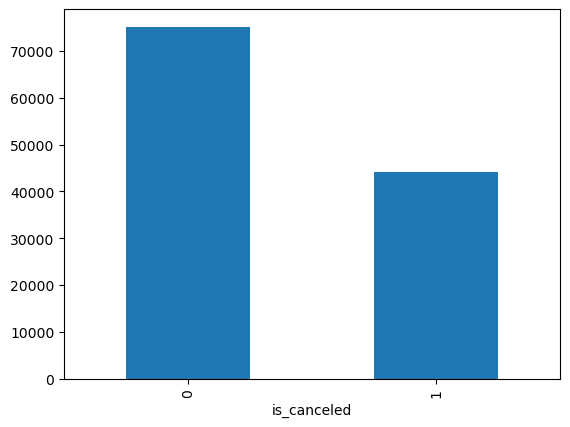

In [6]:
df['is_canceled'].value_counts().plot(kind='bar');

In [7]:
df['is_canceled'].value_counts() / df['is_canceled'].count()

is_canceled
0    0.629584
1    0.370416
Name: count, dtype: float64

In [8]:
df_numeric = df.select_dtypes(include=['number'])  # keep only numeric columns
df_numeric.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [9]:
df_numeric.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

##### above we do corr() on df['is_canceled'] and we sort the values from high to low. Above data shows that if the lead_time is high, the cancelation is high also. but it is not reliable so much.

##### acending = False, makes the sort from high to low.

### Now we will start to do test & train by XGBoost:

In [10]:
x , y = df_numeric.iloc[:, 1:].values , df_numeric.iloc[:, 0].values

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 123)

In [12]:
##### train_test_split is for split the datas to train and test sections randomly. test_size = 33% and train size will be 67%. 

# random_state is used to control the randomness of the split between training and testing data.

# ✅ Why it's important:
# Every time you run train_test_split, it randomly splits your dataset.

# If you don't set random_state, you'll get different results each time.

# If you do set random_state to a fixed number (like 123), you ensure that the same split happens every time you run your code.

# This is crucial for:

# Reproducibility (getting consistent results when rerunning code)

# Debugging and sharing your model with others

# 🔢 What number to choose?
# You can pick any integer (like 0, 42, 123). The number itself doesn't matter—just use the same one if you want consistent results.

In [13]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(random_state= 123)
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

##### As above, n_estimator = None. So we will make it 10, then will fit the datas.

In [14]:
xgb_clf.set_params(n_estimators = 10)
xgb_clf.fit(x_train, y_train)
p = xgb_clf.predict(x_test)

In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     24838
           1       0.77      0.61      0.68     14561

    accuracy                           0.79     39399
   macro avg       0.78      0.75      0.76     39399
weighted avg       0.79      0.79      0.78     39399



In [16]:
accuracy = float(np.sum(p == y_test)) / y_test.shape[0]
accuracy

0.7885986953983604

##### Above we do accuracy by metrics and with formula. Maybe we can increase our accuracy by increasing n_estimators.

In [17]:
print(metrics.confusion_matrix(y_test, p))

[[22178  2660]
 [ 5669  8892]]


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

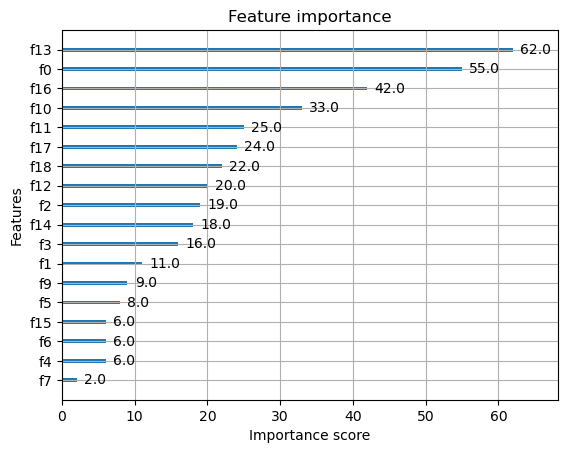

In [18]:
xgb.plot_importance(xgb_clf)

##### In above, we see the important features like agent, lead_time, adr.

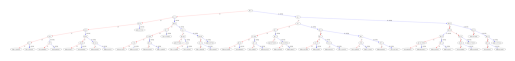

In [19]:
xgb.plot_tree(xgb_clf, tree_idx = 0);

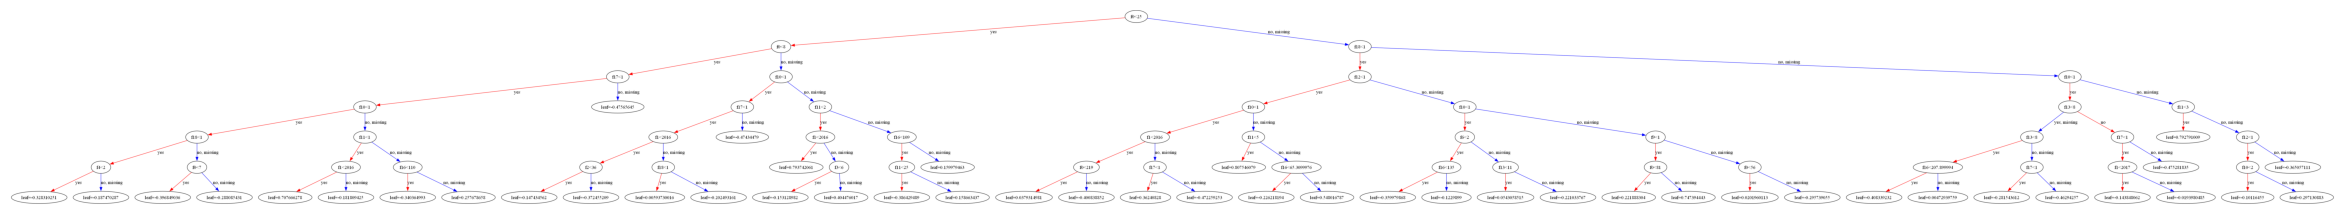

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 20))
xgb.plot_tree(xgb_clf, tree_idx=0, ax=ax)
plt.show()

##### Now we want to investigate the datas by DMatrix.

##### It creates a DMatrix object from your features x and target y. DMatrix is an optimized data structure used internally by XGBoost to train models more efficiently.

#####  Why use DMatrix?
##### XGBoost’s core training API (xgb.train()) requires input in the form of DMatrix, because it:

##### Optimizes memory usage

##### Speeds up training

##### Enables advanced features (like missing value handling and weight management)



In [21]:
df_dmatrix = xgb.DMatrix(data = x, label = y)

##### We use DMatrix instead of test_train_split.

In [22]:
params = {'objective':'binary:logistic', 'max_depth':3}
xgb_cv = xgb.cv(dtrain = df_dmatrix, params = params, nfold=3, num_boost_round = 10, seed = 123, metrics = ['error'])
xgb_cv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.352207,0.022567,0.351838,0.018844
1,0.322745,0.001637,0.322833,0.001796
2,0.321677,0.001218,0.321744,0.002366
3,0.254519,0.001703,0.255315,0.004664
4,0.247253,0.006795,0.247081,0.009292
5,0.244212,0.000935,0.244384,0.004005
6,0.240594,0.002873,0.241184,0.003715
7,0.237997,0.001129,0.237976,0.002566
8,0.238554,0.001494,0.238504,0.002222
9,0.235861,0.000909,0.236117,0.002708


In [23]:
# 1. params = {'objective':'binary:logistic', 'max_depth':3}. also you can give no params and use default params.
# These are the model hyperparameters:

# 'objective': 'binary:logistic' → Use binary classification with logistic regression output (probabilities).

# 'max_depth': 3 → Limit each tree's depth to 3 (controls model complexity, helps prevent overfitting).

# ✅ 2. xgb.cv(...)
# This function performs cross-validation on your training data using DMatrix. It's great for evaluating model performance before training on the full dataset.

# Here's what the parameters do:
# dtrain = df_dmatrix:
# Your input data in the special optimized DMatrix format.

# params = params:
# The model settings you defined above.

# nfold = 3:
# Use 3-fold cross-validation. The dataset is split into 3 parts:

# Train on 2 folds, validate on 1, repeat.

# num_boost_round = 10:
# Run for 10 boosting iterations (i.e., train 10 trees) (train repeatation).

# seed = 123:
# Ensures reproducibility of the random split.

# metrics = ['error']:
# Use classification error as the performance metric.

# Error = fraction of incorrect predictions.

##### cross Validation is like below:

![cv](https://www.researchgate.net/publication/346390613/figure/fig4/AS:962229167988768@1606424719591/fold-Cross-validation-of-XGBoost-model-for-a-set-of-hyper-parameters-proposed-by-Bayesian.png)

##### Above table shows the errors like (train-error-mean or std) and (test-error-mean or std). the opposite of these means are accuracy. 

##### As the table the error comes down after each trains or tests. train-error-mean starts in 0.352207 and ends in 0.235861. and so on.

##### Now we want to see the best accuracy of test_mean:

In [24]:
test_accuracy = 1 - xgb_cv['test-error-mean'].iloc[-1]
test_accuracy

0.7638830513443524

##### Lets make the accuracy better:

In [25]:
xgb_cv = xgb.cv(dtrain = df_dmatrix, params = params, nfold=3, num_boost_round = 40, early_stopping_rounds = 10, seed = 123, metrics = ['error'])
test_accuracy = 1 - xgb_cv['test-error-mean'].iloc[-1]
test_accuracy

0.7929474592266847

In [26]:
# What does early_stopping_rounds=10 mean?
# It tells XGBoost:

# "If the validation metric (error) doesn't improve for 10 consecutive boosting rounds, stop the training early."

# ✅ Why use it?
# Helps prevent overfitting.

# Saves training time.

# Automatically selects the best number of trees (num_boost_round) based on validation performance.

##### Now we want to examine xgboost without using cv:

In [27]:
from sklearn.metrics import accuracy_score
xgb_clf = xgb.XGBClassifier(n_estimators = 25, random_state = 123)

##### This function will measure how accurate your model's predictions are compared to the true labels.

##### It calculates:

##### Accuracy = Number of correct predictions / Total predictions


In [28]:
xgb_clf.set_params(max_depth =10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=25,
              n_jobs=None, num_parallel_tree=None, ...)

##### Updates the classifier to allow each tree to have up to 10 levels deep.

##### Deeper trees capture more complex patterns but may risk overfitting.

In [29]:
xgb_clf.fit(x_train, y_train)
p = xgb_clf.predict(x_test)
accuracy_score(y_test , p)

0.8400720830477931

##### lets change one parameter:

In [30]:
xgb_clf.set_params(colsample_bytree = 0.5)
xgb_clf.fit(x_train, y_train)
p = xgb_clf.predict(x_test)
accuracy_score(y_test , p)

0.8410111931774918

##### colsample_bytree controls the fraction of features (columns) to be randomly sampled for each tree.

##### colsample_bytree=0.5: use 50% of the features randomly selected per tree.

##### Helps prevent overfitting, especially when you have many features and It adds diversity among trees (a form of regularization).



##### lets changes another params and see the results:

In [31]:
xgb_clf.set_params(subsample = 0.75)
xgb_clf.fit(x_train, y_train)
p = xgb_clf.predict(x_test)
accuracy_score(y_test , p)

0.8396913627249423

In [32]:
xgb_clf.set_params(learning_rate = 0.3)
xgb_clf.fit(x_train, y_train)
p = xgb_clf.predict(x_test)
accuracy_score(y_test , p)

0.8396913627249423

In [33]:
xgb_clf.set_params(reg_alpha = 0.01)
xgb_clf.fit(x_train, y_train)
p = xgb_clf.predict(x_test)
accuracy_score(y_test , p)

0.8393360237569482

In [34]:
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 25,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': 0.01,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.75,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### Now we want to use Hyperparameter Tuning for xgboost.

##### For better understanding, we will explain it in next session.

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
params = {
    'max_depth': list(range(3, 12)),
    'alpha' : [0, 0.001, 0.01, 0.1, 1],
    'subsample' : [0.5, 0.75, 1],
    'learning_rate' : np.linspace(0.01, 0.5, 10),
    'n_estimators': [10, 25, 40]
}
xgb_clf = xgb.XGBClassifier(random_state = 123)
xgb_rs = RandomizedSearchCV(xgb_clf, param_distributions = params, cv=3, n_iter =5, verbose=2, random_state=123)
xgb_rs.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.0s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.0s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.0s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.1s
[CV] END

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5,
                   param_distributions={'alpha': [0, 0.001, 0.01, 0.1, 1],
                                        'learning_rate': array([0.01      , 0.06444444, 0.11888889, 0.17333333, 0.22777778,
       0.28222222, 0.33666667, 0.39111111, 0.44555556, 0.5       ]),
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11],
                                        'n_estimators': [10, 25, 40],
                                        'subsample': [0.5, 0.75, 1]},
                   random_state=123, verbose=2)

In [37]:
print(xgb_rs.best_params_)
print(xgb_rs.best_score_)

{'subsample': 0.5, 'n_estimators': 40, 'max_depth': 10, 'learning_rate': 0.17333333333333334, 'alpha': 0.001}
0.834518897544782
